### DATA CODE BOOK

[Data Dictionary](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#AGE)

# Reading dataset

In [1]:
#pip install seaborn

In [2]:
#pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("./scfp2022excel/SCFP2022.csv")

In [5]:
df.head()
#print(df.shape)

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


##### 

One of the first things you might notice here is that this dataset is HUGE — over 20,000 rows and 356 columns! SO MUCH DATA!!! We won't have time to explore all of the features in this dataset, but you can look in the data dictionary for this project for details and links to the official Code Book. For now, let's just say that this dataset tracks all sorts of behaviors relating to the ways households earn, save, and spend money in the United States.

For this project, we're going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the "TURNFEAR" columnumn.



## Exploration Data Analysis

#### 
Here we will subset to households which have been feared to been turned down or feared being turned down for credit ("TURNFEAR" == 1) and assign this subset to the variable name df_fear.

In [6]:
mask = df["TURNFEAR"] ==1
mask.sum()

3839

In [7]:
mask = df["TURNFEAR"] ==1
df_fear = df[mask]
print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear type: <class 'pandas.core.frame.DataFrame'>
df_fear shape: (3839, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


### AGE

##### Now that we have our subset, let's explore the characteristics of this group. One of the features is age group ("AGECL").

In [8]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [1 4 2 3 5 6]


In [9]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head(10)

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (3839,)


20     Under 35
21     Under 35
22     Under 35
23     Under 35
24     Under 35
110       55-64
111       55-64
112       55-64
113       55-64
114       55-64
Name: AGECL, dtype: object

<Axes: title={'center': 'Gredit Fearful : Age Groups'}, xlabel='Age Groups', ylabel='Frequencies (counts)'>

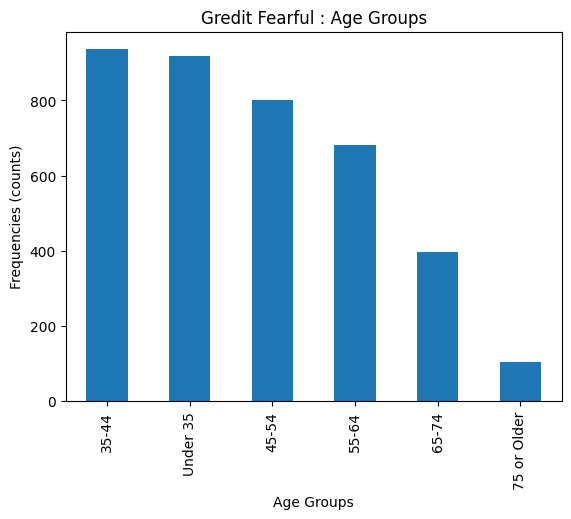

In [10]:
age_cl_value_counts = age_cl.value_counts()
# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(kind = "bar", 
                         xlabel= "Age Groups", 
                         ylabel = "Frequencies (counts)", 
                         title = "Gredit Fearful : Age Groups")

####  
Our chart is telling us that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more granular understanding of the data.

To do that, we'll need to look at a different variable: "AGE". Whereas "AGECL" was a categorical variable, "AGE" is continuous, so we can use it to make a histogram of our own.

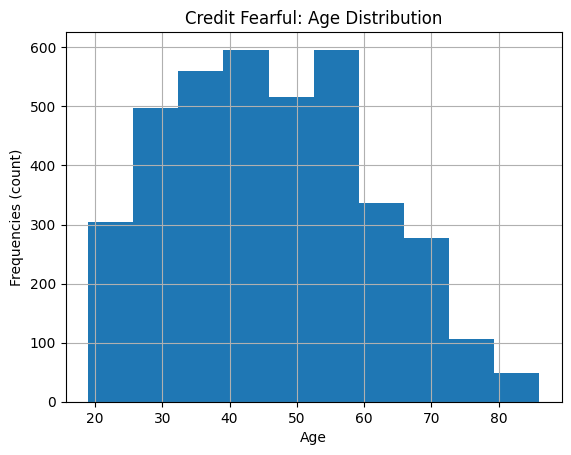

In [11]:
# Plot histogram of "AGE"
df_fear["AGE"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequencies (count)")
plt.title("Credit Fearful: Age Distribution")

# Show the plot
plt.show()


####
From our chart above, it looks like younger people are still more concerned about being able to secure a loan than older people, but the people who are most concerned seem to be between 30 and 40.

### INCOME

#### 
Lets explore the income level. Are people with lower incomes concerned about being denied credit, or is that something people with more money worry about? In order to answer that question, we'll need to again compare the entire dataset with our subgroup using the "INCCAT" feature, which captures income percentile groups. This time, though, we'll make a single, side-by-side bar chart

####
We will create a DataFrame df_inccat that shows the normalized frequency for income categories for both the credit fearful and non-credit fearful households in the dataset.

In [12]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = df["INCCAT"].replace(inccat_dict).groupby(df["TURNFEAR"]).value_counts(normalize =True).rename("FREQUENCY").to_frame().reset_index()
                            

print("df_inccat type:", type(df_inccat))
print("df_inccat shape:", df_inccat.shape)
df_inccat

df_inccat type: <class 'pandas.core.frame.DataFrame'>
df_inccat shape: (12, 3)


,TURNFEAR,INCCAT,FREQUENCY
0,0,90-100,0.303982
1,0,60-79.9,0.162312
2,0,40-59.9,0.144492
3,0,0-20,0.140050
4,0,21-39.9,0.139162
5,0,80-89.9,0.110002
6,1,0-20,0.340714
7,1,21-39.9,0.266476
8,1,40-59.9,0.205001
9,1,60-79.9,0.112529


####
Using seaborn, we will create a side-by-side bar chart of df_inccat. Set hue to "TURNFEAR", and make sure that the income categories are in the correct order along the x-axis. We label the x-axis "Income Category", the y-axis "Frequency (%)", and use the title "Income Distribution: Credit Fearful vs. Non-fearful"

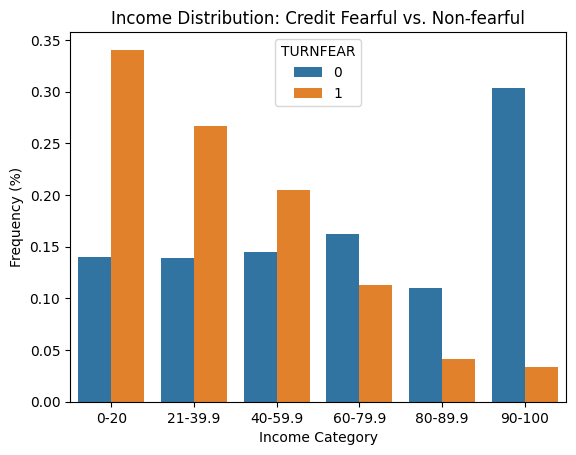

In [13]:
# Create bar chart of `df_inccat`
sns.barplot(x="INCCAT",
            y= "FREQUENCY", 
            hue = "TURNFEAR",
            data = df_inccat,
            order=inccat_dict.values())
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

####
Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. In other words, the credit fearful have lower incomes.

So, based on all this, what do we know? Among the people who responded that they were indeed worried about being approved for credit after having been denied in the past five years, a plurality of the young and low-income had the highest number of respondents. That makes sense, right? Young people tend to make less money and rely more heavily on credit to get their lives off the ground, so having been denied credit makes them more anxious about the future.

### RACE

   ####
Now that we have an understanding of how age and income relate to our outcome of interest, let's try some other possibilities, starting with race. And if we look at the Code Book for "RACE", we can see that there are 4 categories.

If you observe from the code book -race, there's no 4 category here. If a value for 4 did exist, it would be reasonable to assign it to "Asian American / Pacific Islander" — a group that doesn't seem to be represented in the dataset. This is a strange omission, but you'll often find that large public datasets have these sorts of issues. The important thing is to always read the data dictionary carefully. In this case, remember that this dataset doesn't provide a complete picture of race in America — something that you'd have to explain to anyone interested in your analysis.

#### 
Lets create a horizontal bar chart showing the normalized value counts for "RACE". In your chart, you should replace the numerical values with the true group names. Be sure to label the x-axis "Frequency (%)", the y-axis "Race", and use the title "Credit Fearful: Racial Groups". Finally, set the xlim for this plot to (0,1).

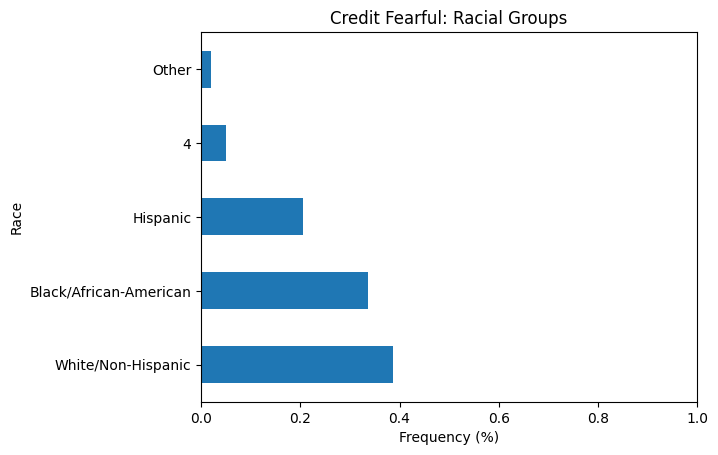

In [14]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind= "barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

####
This suggests that White/Non-Hispanic people worry more about being denied credit, but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

Let's recreate the horizontal bar chart we just made, but this time we use the entire dataset df instead of the subset df_fear. The title of this plot should be "SCF Respondents: Racial Groups". 


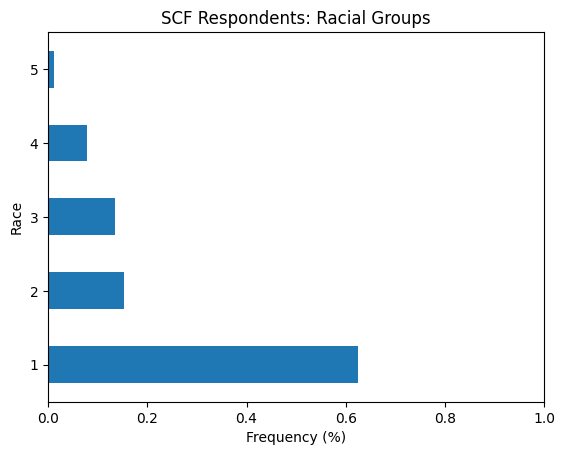

In [16]:
race = df["RACE"]
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind = "barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

####
How does this second bar chart change our perception of the first one? On the one hand, we can see that White Non-Hispanics account for around 60% of whole dataset, but only around 40% of credit fearful respondents. On the other hand, Black and Hispanic respondents represent 18% of the whole dataset but 35% of credit fearful respondents. In other words, Black and Hispanic households are actually more likely to be in the credit fearful group.

### ASSETS

####
Not all the data is demographic, though. If we were working for a bank, we would probably care less about how old the people are, and more about their ability to carry more debt. If we were going to build a model for that, we'd want to establish some relationships among the variables, and making some correlation matrices is a good place to start.

First, let's zoom out a little bit. We've been looking at only the people who answered "yes" when the survey asked about `"TURNFEAR"`, but what if we looked at everyone instead? To begin with, let's bring in a clear dataset and run a single correlatio

Lets calculate the correlation coefficient for "ASSET" and "HOUSES" in the whole dataset df.n.

In [18]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.561776546509548


#### 
That's a moderate positive correlation, which we would probably expect, right? For many Americans, the value of their primary residence makes up most of the value of their total assets. What about the people in our TURNFEAR subset, though? Let's run that correlation to see if there's a difference.

Lets now calculate the correlation coefficient for "ASSET" and "HOUSES" in the whole credit-fearful subset df_fear.

In [19]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.3649545427641164


####
Let's again make correlation matrices using the rest of the data for both df and df_fear and see if the differences persist. Here, we'll look at only 5 features: "ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC".

In [20]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.561777,0.706685,0.307143,0.120139
HOUSES,0.561777,1.000000,0.384699,0.251876,0.186120
INCOME,0.706685,0.384699,1.000000,0.306534,0.096549
DEBT,0.307143,0.251876,0.306534,1.000000,0.086561
EDUC,0.120139,0.186120,0.096549,0.086561,1.000000


####
Correlation matrix using `df_fear'.

In [21]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]

corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.364955,0.893282,0.477171,0.110659
HOUSES,0.364955,1.000000,0.314501,0.676984,0.195174
INCOME,0.893282,0.314501,1.000000,0.456622,0.108845
DEBT,0.477171,0.676984,0.456622,1.000000,0.182570
EDUC,0.110659,0.195174,0.108845,0.182570,1.000000


####
Whoa! There are some pretty important differences here! The relationship between "DEBT" and "HOUSES" is positive for both datasets, but while the coefficient for df is fairly weak at 0.25, the same number for df_fear is 0.67.

Remember, the closer a correlation coefficient is to 1.0, the more exactly they correspond. In this case, that means the value of the primary residence and the total debt held by the household is getting pretty close to being the same. This suggests that the main source of debt being carried by our "TURNFEAR" folks is their primary residence, which, again, is an intuitive finding.

"DEBT" and "ASSET" share a similarly striking difference, as do "EDUC" and "DEBT" which, while not as extreme a contrast as the other, is still big enough to catch the interest of our hypothetical banker.

Let's make some visualizations to show these relationships graphically.